In [1]:
import numpy
from numpy import unravel_index
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 10))

In [2]:
def First_trace_back(starts,seq1,seq2,score, gap_penalty,match_score, mis_match_score): 
    for k in range(len(starts)):
        # Create variables to store alignment
        align1 = ""
        align2 = ""

        # Start from the bottom right cell in matrix
        c = starts[k][1] 
        r = starts[k][0]

        # We'll use i and j to keep track of where we are in the matrix, just like above
        while c > 0 and r > 0 and score[r][c] > 0: # end touching the top or the left edge
            score_current = score[r][c]
            score_diagonal = score[r-1][c-1]
            score_up = score[r-1][c]
            score_left = score[r][c-1]
          # Check to figure out which cell the current score was calculated from,
            # then update i and j to correspond to that cell.
            if score_current == score_diagonal + match_score and seq1[r-1] == seq2[c-1]:
                align1 += seq1[r-1]
                align2 += seq2[c-1]
                r -= 1
                c -= 1
            elif score_current == score_diagonal + mis_match_score:
                align1 += seq1[r-1]
                align2 += seq2[c-1]
                r -= 1
                c -= 1
            elif score_current == score_up + gap_penalty:
                align1 += seq1[r-1]
                align2 += '-'
                r -= 1
            elif score_current == score_left + gap_penalty:
                align1 += '-'
                align2 += seq2[c-1]
                c -= 1

        # Finish tracing up to the top left cell
        while r > 0 and score[r][c] > 0:
            align1 += seq1[r-1]
            align2 += '-'
            r -= 1
        while c > 0 and score[r][c] > 0:
            align1 += '-'
            align2 += seq2[c-1]
            c -= 1

        # Since we traversed the score matrix from the bottom right, our two sequences will be reversed.
        # These two lines reverse the order of the characters in each sequence.
        align1 = align1[::-1]
        align2 = align2[::-1]

        print(align2)
        print(align1)
        print('********************')

In [3]:
def Second_trace_back(starts,seq1,seq2,score, gap_penalty,match_score, mis_match_score): 
    for k in range(len(starts)):
        # Create variables to store alignment
        align1 = ""
        align2 = ""

        # Start from the bottom right cell in matrix
        c = starts[k][1] 
        r = starts[k][0]

        # We'll use i and j to keep track of where we are in the matrix, just like above
        while c > 0 and r > 0 and score[r][c] > 0: # end touching the top or the left edge
            score_current = score[r][c]
            score_diagonal = score[r-1][c-1]
            score_up = score[r-1][c]
            score_left = score[r][c-1]
          # Check to figure out which cell the current score was calculated from,
            # then update i and j to correspond to that cell.
            if score_current == score_up + gap_penalty:
                align1 += seq1[r-1]
                align2 += '-'
                r -= 1
            elif score_current == score_left + gap_penalty:
                align1 += '-'
                align2 += seq2[c-1]
                c -= 1
            elif score_current == score_diagonal + mis_match_score:
                align1 += seq1[r-1]
                align2 += seq2[c-1]
                r -= 1
                c -= 1
            elif score_current == score_diagonal + match_score and seq1[r-1] == seq2[c-1] :
                align1 += seq1[r-1]
                align2 += seq2[c-1]
                r -= 1
                c -= 1

        # Finish tracing up to the top left cell
        while r > 0 and score[r][c] > 0:
            align1 += seq1[r-1]
            align2 += '-'
            r -= 1
        while c > 0 and score[r][c] > 0:
            align1 += '-'
            align2 += seq2[c-1]
            c -= 1

        # Since we traversed the score matrix from the bottom right, our two sequences will be reversed.
        # These two lines reverse the order of the characters in each sequence.
        align1 = align1[::-1]
        align2 = align2[::-1]

        print(align2)
        print(align1)
        print('********************')

In [4]:
def Third_trace_back(starts,seq1,seq2,score, gap_penalty,match_score, mis_match_score): 
    for k in range(len(starts)):
        # Create variables to store alignment
        align1 = ""
        align2 = ""

        # Start from the bottom right cell in matrix
        c = starts[k][1] 
        r = starts[k][0]

        # We'll use i and j to keep track of where we are in the matrix, just like above
        while c > 0 and r > 0 and score[r][c] > 0: # end touching the top or the left edge
            score_current = score[r][c]
            score_diagonal = score[r-1][c-1]
            score_up = score[r-1][c]
            score_left = score[r][c-1]
          # Check to figure out which cell the current score was calculated from,
            # then update i and j to correspond to that cell.
            if score_current == score_left + gap_penalty:
                align1 += '-'
                align2 += seq2[c-1]
                c -= 1
            elif score_current == score_diagonal + match_score and seq1[r-1] == seq2[c-1] :
                align1 += seq1[r-1]
                align2 += seq2[c-1]
                r -= 1
                c -= 1
            elif score_current == score_diagonal + mis_match_score:
                align1 += seq1[r-1]
                align2 += seq2[c-1]
                r -= 1
                c -= 1
            elif score_current == score_up + gap_penalty:
                align1 += seq1[r-1]
                align2 += '-'
                r -= 1


        # Finish tracing up to the top left cell
        while r > 0 and score[r][c] > 0:
            align1 += seq1[r-1]
            align2 += '-'
            r -= 1
        while c > 0 and score[r][c] > 0:
            align1 += '-'
            align2 += seq2[c-1]
            c -= 1

        # Since we traversed the score matrix from the bottom right, our two sequences will be reversed.
        # These two lines reverse the order of the characters in each sequence.
        align1 = align1[::-1]
        align2 = align2[::-1]

        print(align2)
        print(align1)
        print('********************')

In [5]:
def draw_mat(seqx,seqy,matrix):
    fig, ax = plt.subplots()
    intersection_matrix = numpy.random.randint(0, 20, size=(len(seqx)+1, len(seqy)+1))
    ax.matshow(intersection_matrix, cmap=plt.cm.Blues)
    yt=plt.xticks(numpy.arange(1,len(list(seqy))+1),list(seqy))
    xt=plt.yticks(numpy.arange(1,len(list(seqx))+1),list(seqx))
    for i in range(len(seqx)+1):
        for j in range(len(seqy)+1):
            c = matrix[i,j]
            ax.text(j, i, str(int(c)), va='center', ha='center', fontsize=16)

In [6]:
def Smith_Waterman(seqx, seqy, gap_penalty, match_score, mis_match_score):
    
    # Store length of two sequences
    w = len(seqx) + 1  
    h = len(seqy) + 1
    
    # Generate matrix of zeros to store scores
    score = numpy.empty((w,h))
    score.fill(0)
    # Fill out first column
    for i in range(w):
        score[i][0] = 0
    
    # Fill out first row
    for j in range(h):
        score[0][j] = 0
    
    # Fill out all other values in the score matrix
    for i in range(1, w):
        for j in range(1, h):
            # Calculate the score by checking the top, left, and diagonal cells
            if(seqx[i-1] == seqy[j-1]):
                match = score[i - 1][j - 1] + match_score
            else:
                match = score[i - 1][j - 1] + mis_match_score
            gap1 = score[i - 1][j] + gap_penalty
            gap2 = score[i][j - 1] + gap_penalty
            # Record the maximum score from the three possible scores calculated above
            score[i][j] = max(match, gap1, gap2)
            if(score[i][j]<0):
                score[i][j] = 0
    return score

In [8]:
def get_inputs(seqx,seqy,gap,match,mismatch):
    matrix = Smith_Waterman(seqx,seqy,gap,match,mismatch)
    starts = numpy.where(matrix == matrix.max())
    starts= list(zip(starts[0], starts[1]))
    draw_mat(seqx,seqy,matrix)
    print("First possible alignment")
    First_trace_back(starts,seqx,seqy,matrix, gap,match, mismatch)
    print("Second possible alignment")
    Second_trace_back(starts,seqx,seqy,matrix, gap,match, mismatch)
    print("Third possible alignment")
    Third_trace_back(starts,seqx,seqy,matrix, gap,match, mismatch)

First possible alignment
A-C-TTTTACT
ACCATTTTAAT
********************
Second possible alignment
AC--TTTTACT
ACCATTTTAAT
********************
Third possible alignment
A-C-TTTTACT
ACCATTTTAAT
********************


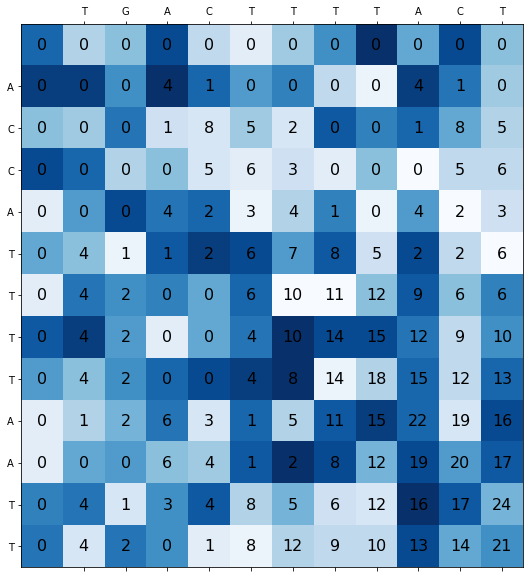

In [10]:
seqx = "ACCATTTTAATT"
seqy = "TGACTTTTACT"
match = 4
mismatch = -2
gap = -3
get_inputs(seqx,seqy,gap,match,mismatch)

First possible alignment
AA
AA
********************
CG
CG
********************
Second possible alignment
AA
AA
********************
CG
CG
********************
Third possible alignment
AA
AA
********************
CG
CG
********************


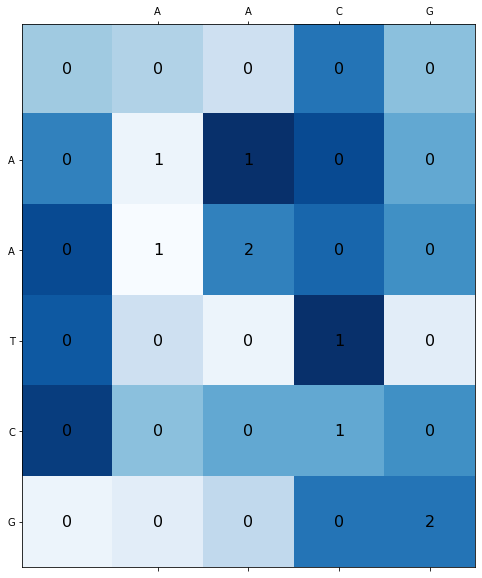

In [11]:
seqx = "AATCG"
seqy = "AACG"
match = 1
mismatch = -1
gap = -2
get_inputs(seqx,seqy,gap,match,mismatch)

First possible alignment
TCGTA
TCATA
********************
Second possible alignment
TCGTA
TCATA
********************
Third possible alignment
TCGTA
TCATA
********************


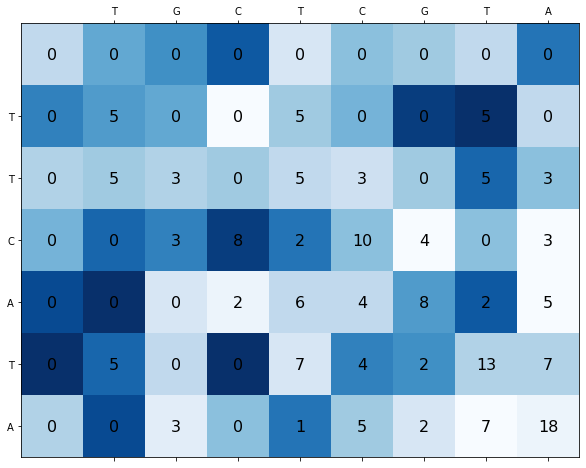

In [12]:
seqx = "TTCATA"
seqy = "TGCTCGTA"
match = 5
mismatch = -2
gap = -6
get_inputs(seqx,seqy,gap,match,mismatch)